# Initialization

In [1]:
from IPython.display import Image, display
from core.common_types import DiagramType, Diagram_ManagerState
from mermaid_agent import build_diagram_agent
from langchain_openai import ChatOpenAI



# Params

In [2]:
model = "deepseek-coder-v2-lite-instruct"
llm = ChatOpenAI(
    base_url="http://localhost:1234/v1",
    model=model, 
    api_key="sk-1234",
    temperature=0
)

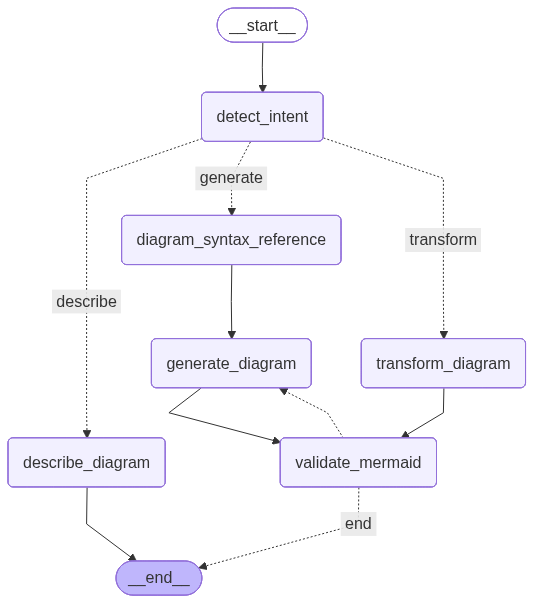

In [3]:
agent = build_diagram_agent()
display(Image(agent.get_graph().draw_mermaid_png()))



In [4]:
import urllib.parse

def show_mermaid(mermaid_code):
    """Display Mermaid diagram using mermaid.ink"""
    encoded_code = urllib.parse.quote(mermaid_code)
    url = f"https://mermaid.ink/img/{encoded_code}"
    print(url)
    display(Image(url=url))



# Describe Diagram 

In [ ]:
prompt = """
Describe the following diagram in detail:
sequenceDiagram
    participant U as User
    participant S as Server
    participant A as Authentication Service

    U->>+S: Request login
    S-->>-U: Redirect to login page

    U->>+S: Submit credentials
    S->>+A: Validate credentials
    A-->>-S: Token generation request
    S->>+A: Generate JWT token
    A-->>-S: Send JWT token
    S-->>-U: Return JWT token

    U->>+S: Request protected resource with JWT token
    S->>+A: Validate JWT token
    A-->>-S: Token is valid
    S-->>-U: Access granted
"""

diagram_type = DiagramType.SEQUENCE_DIAGRAM

initial_state = Diagram_ManagerState(
    user_prompt=prompt,
    diagram_type=diagram_type,
    action="describe",
    llm=llm
)

result = agent.invoke(initial_state)
print(result['description'])

# Transform Diagram

In [1]:
prompt = """
Generate a C4 system context diagram based on the following sequence diagram:
sequenceDiagram
    participant U as User
    participant S as Server
    participant A as Authentication Service

    U->>+S: Request login
    S-->>-U: Redirect to login page

    U->>+S: Submit credentials
    S->>+A: Validate credentials
    A-->>-S: Token generation request
    S->>+A: Generate JWT token
    A-->>-S: Send JWT token
    S-->>-U: Return JWT token

    U->>+S: Request protected resource with JWT token
    S->>+A: Validate JWT token
    A-->>-S: Token is valid
    S-->>-U: Access granted
"""
diagram_type = DiagramType.C4Context


initial_state = Diagram_ManagerState(
    user_prompt=prompt,
    diagram_type=diagram_type,
    action="transform",
    llm=llm
)


result = agent.invoke(initial_state)
show_mermaid(result['mermaid_code'])

NameError: name 'DiagramType' is not defined